# Linear regression:


In [1]:
#some linear looking data :
import numpy as np
np.random.seed(42)
m=100 #no. of instances
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1) #np.random.randn(m,1)=>some noise

# Normal equation:


In [2]:
from sklearn.preprocessing import add_dummy_feature
X_b=add_dummy_feature(X) #add x0=1 to each instance.we manually add that 1.0 column — that’s what lets the model learn the intercept.Without it, your model would force the line to go through the origin (0,0) — usually not what you want.
theta_best=np.linalg.inv(X_b.T @ X_b)@ X_b.T @ y  # @ perfoms matrix multiplication

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
#Making predictions using theta^
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta_best  #h(theta)=X*theta
y_predict

array([[4.21509616],
       [9.75532293]])

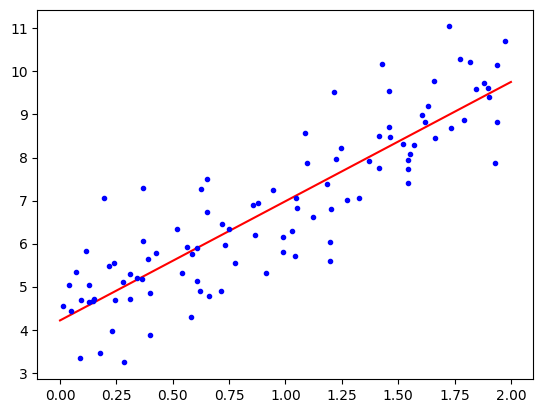

In [5]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-",label="Predictions") #this draws a predicted line based on the model
plt.plot(X,y,"b.") #real data points as blue dots
[...]
plt.show()

In [6]:
#performing linear regression using Scikit-learn:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
#This is just another way (SVD-based) to solve for the best line — and it’s more numerically stable:
theta_best_svd,residuals,rank,s=np.linalg.lstsq(X_b,y,rcond=1e-6) #This line solves for the best theta (model parameters) using np.linalg.lstsq, which stands for Least Squares
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Gradient Descent


In [ ]:
#batch gradient descent:
eta=0.1 #learning rate
n_epochs=1000
m=len(X_b) #No. of instances

np.random.seed(42)
theta=np.random.randn(2,1) #randomly initialized model parameters

for epoch in range(n_epochs):
    greadients=2/m * X_b.T @ (X_b @ theta - y)
    theta= theta-eta*greadients

In [10]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
#stochastic gradient descent using normal equation:
n_epochs=50
t0,t1=5,50

def learning_schedule(t):
    return t0/(t+t1)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index=np.random.randint(m)
        xi=X_b[random_index:random_index+1]
        yi=y[random_index:random_index+1]
        greadients=2*xi.T @ (xi@ theta -yi) #for SGD,donot divide by m
        eta=learning_schedule(epoch*m + iteration)
        theta=theta-eta*greadients

In [14]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
#stochastic gradient descent using scikit learn:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000,tol=1e-5,penalty=None,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel()) #y.ravel because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [17]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))